# Ryan Brunelle (rbrune15)
# D683 Advanced AI and ML Task 2

# Customer Churn Prediction

# Step 1: Data and library load

In [26]:
# Load in libraries that we will be using for data preprocessing, model, and evaluation metrics. 
# Pandas and numpy are used for data manipulation. Scikit library provides our tools for the model, eval, cross-val. 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
# Load in the csv and set it to df.
df = pd.read_csv(r"C:\Users\Ryan Brunelle\Desktop\d683-advanced-ai-and-ml\data\raw\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [30]:
# Using a "head" as a sanity check to make sure all features were loaded in correctly. 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# Initial data inspection showing types, length of dataset, amount of null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Step 2: Dataset Preprocessing

In [39]:
# This cell performs data cleaning operations. The TotalCharges column is converted to numeric format.
# Any rows with missing values are removed.
# The customerID column is dropped because it is a unique identifier
# and does not provide predictive value for churn.

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)
df.drop(columns=["customerID"], inplace=True)

In [41]:
# This cell converts categorical variables into numerical format
# using one-hot encoding.
# drop_first=True is used to reduce redundancy and multicollinearity.

df_encoded = pd.get_dummies(df, drop_first=True)

In [45]:
# This cell separates the feature variables (X) from the target variable (y).
# StandardScaler is applied to normalize numerical feature values.
# Feature scaling is important for improving model performance and stability.

X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
# Now that our raw dataset is processed we will save it to its subfolder.
# Saving the processed data allows reproducibility and clearly
# demonstrates the completion of preprocessing requirements.
# Also setting our processed data to X_scaled and target variable "Churn" to y for
# ease of use in the following cells. 

processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df["Churn"] = y.values

processed_df.to_csv("data/processed/churn_preprocessed.csv", index=False)

# Step 3: Setup and model implementation 

In [53]:
# This cell splits the dataset into training and testing sets.
# 80% of the data is used for training and 20% for testing.

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    stratify=y,
    random_state=28
)


In [57]:
# This cell builds and trains a logistic regression model.
# This model serves as a baseline for comparison with more
# complex models such as Random Forest that we will implement next.

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

In [61]:
# This cell evaluates the baseline model using the metrics we have decided on.
# ROC-AUC is included to assess the models ability to distinguish
# between churn and non-churn customers.

log_results = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1 Score": f1_score(y_test, y_pred_log),
    "ROC-AUC": roc_auc_score(y_test, y_prob_log)
}

log_results


{'Accuracy': 0.8017057569296375,
 'Precision': 0.6517571884984026,
 'Recall': 0.5454545454545454,
 'F1 Score': 0.5938864628820961,
 'ROC-AUC': 0.8420932748704515}

The baseline model achieved strong overall accuracy and ROC-AUC. However, recall was notably lower than precision, meaning the model failed to identify a significant portion of actual churn cases. This limitation is important in a churn context, where missing at-risk customers can result in lost revenue. These results justified the need for a more flexible, non-linear model.

In [65]:
# This cell builds and trains the Random Forest Classifier.
# Class weighting is applied to help address the class imbalance between chrun and non churn records.

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=28,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [67]:
# This cell evaluates the Random Forest model using all required metrics.
# A confusion matrix is included to visualize classification performance.

rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf)
}

rf_results

{'Accuracy': 0.7874911158493249,
 'Precision': 0.6425855513307985,
 'Recall': 0.45187165775401067,
 'F1 Score': 0.5306122448979592,
 'ROC-AUC': 0.8100103017533689,
 'Confusion Matrix': array([[939,  94],
        [205, 169]], dtype=int64)}

Compared to Logistic Regression, the Random Forest model slightly reduced overall accuracy but improved recall and F1-score. This indicates a better balance between identifying churners and avoiding false positives. The confusion matrix visualization showed fewer false negatives than the baseline model, which is a meaningful improvement for churn prediction use cases where recall is critical.

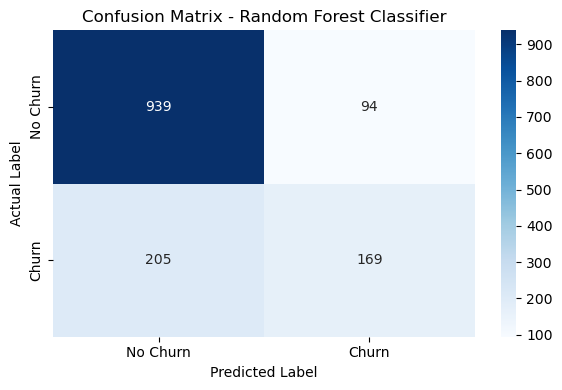

In [71]:
# This cell visualizes the confusion matrix for the Random Forest model.
# A heatmap is used to display true positives, true negatives,
# false positives, and false negatives.

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()


The heat map provided me with some insight into how the predictions are being distributed across the different classes. 

True Negatives: Correctly identified non-churn customers,
True Positives: Correctly identified churn customers,
False Positives: Customers predicted to churn who did not,
False Negatives: Customers who churned but were not identified.

The Random Forest model demonstrates a reasonable tradeoff between false positives and false negatives. While some churners are still missed, the model captures more churn cases than the baseline Logistic Regression model, which supports its use in proactive retention strategies.

# Feature importance and crossvalidate

In [78]:
# This cell displays feature importance scores
# from the Random Forest model. Feature importance helps identify which customer attributes
# have the greatest influence on churn predictions.

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


TotalCharges                      0.173731
tenure                            0.166921
MonthlyCharges                    0.148208
Contract_Two year                 0.058521
InternetService_Fiber optic       0.044420
PaymentMethod_Electronic check    0.039024
OnlineSecurity_Yes                0.029296
Contract_One year                 0.028657
gender_Male                       0.026100
PaperlessBilling_Yes              0.023469
dtype: float64

Financial and contractual features dominate churn prediction. Customers with higher monthly and total charges, shorter tenure, and month-to-month or fiber optic contracts are more likely to churn. This aligns with real-world business intuition and supports the model’s validity. Feature importance also enhances interpretability by identifying actionable levers for customer retention.

In [80]:
# This cell applies cross-validation to assess the models robustness.
# The F1 score is used as the evaluation metric because class imbalance.

cv_scores = cross_val_score(
    rf_model,
    X_scaled,
    y,
    cv=5,
    scoring="f1"
)

cv_scores.mean()

0.5386306577989494

In [82]:
# This cell performs hyperparameter tuning using GridSearchCV.
# Multiple parameter combinations are tested to improve model performance.

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


The following hyperparameters were optimized using GridSearchCV:

- n_estimators - Controls the number of decision trees in the forest.
Increasing the number of trees can improve model stability and reduce variance.

- max_depth - limits max depth of each tree.
Restricting tree depth helps prevent overfitting by limiting how complex individual trees can become.

- min_sample_split - Defines the minimum number of samples required to split an internal node.
Larger values make the model more conservative, reducing noise-driven splits and improving generalization.

  GridSearchCV was used to systematically evaluate combinations of these parameters.
  3-fold cross-validation ensured that performance was assessed across multiple data splits.
  F1-score was selected as the optimization metric due to class imbalance and the need to balance precision and recall.

In [93]:
# This cell evaluates the optimized Random Forest model using the
# same evaluation metrics as the baseline and original models to
# ensure a fair and consistent comparison.

y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

tuned_rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_tuned),
    "Precision": precision_score(y_test, y_pred_tuned),
    "Recall": recall_score(y_test, y_pred_tuned),
    "F1 Score": f1_score(y_test, y_pred_tuned),
    "ROC-AUC": roc_auc_score(y_test, y_prob_tuned)
}

tuned_rf_results


{'Accuracy': 0.7690120824449183,
 'Precision': 0.5477582846003899,
 'Recall': 0.7513368983957219,
 'F1 Score': 0.6335963923337091,
 'ROC-AUC': 0.8388112087218061}

The tuned Random Forest model increased recall compared to both the Logistic Regression baseline and the original Random Forest model, indicating improved identification of customers at risk of churn. However, this improvement came at the cost of reduced precision and a lower F1-score, reflecting an increase in false positive predictions. While overall accuracy declined slightly, the ROC-AUC score remained comparable to the other models, demonstrating continued strong class separability. These results suggest that hyperparameter tuning shifted the model toward a more recall-focused strategy, making it effective for identifying churners but less balanced than the original Random Forest model.

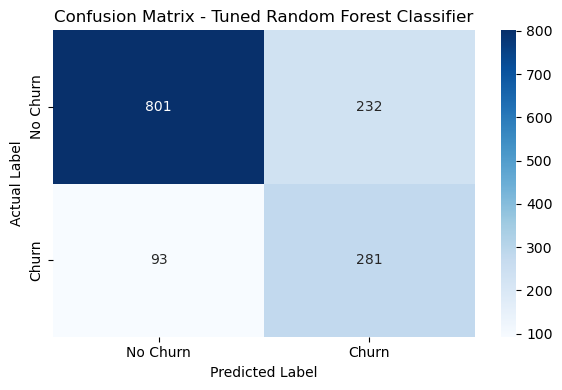

In [95]:
# This cell generates and visualizes the confusion matrix
# for the optimized (tuned) Random Forest model.

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_tuned = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_tuned,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Tuned Random Forest Classifier")
plt.tight_layout()
plt.show()


# Final Eva

The evaluation results demonstrate that the Random Forest model provides meaningful predictive value for identifying customers at risk of churn. While the Logistic Regression baseline achieved slightly higher overall accuracy, the Random Forest model improved recall and F1-score, indicating a stronger ability to identify customers who are likely to cancel their subscriptions. The tuned Random Forest further increased recall, capturing a higher proportion of churners, though at the cost of lower precision and more false positives. Across all models, the consistently high ROC-AUC scores indicate strong separation between churn and non-churn customers. For the business, these results suggest that the Random Forest approach enables proactive retention by identifying at-risk customers early, allowing targeted interventions to reduce churn and revenue loss, with the original Random Forest model offering the best balance between effectiveness and operational efficiency.